In [1]:
#This is an analysis of the duration of time i spent watching the first two seasons of New Amsterdam, a popular netflix medical drama.
#First, we import pandas and sk it to read our csv document which has been downloaded from netflix.

In [2]:
import pandas as pd
df = pd.read_csv('desktop/ViewingActivity.csv')

In [3]:
# What is the total number of rows and columns?

In [4]:
df.shape

(1424, 10)

In [5]:
#A preview of the data - the first row

In [6]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Farida,2021-05-15 21:38:15,00:19:56,NaN,I Am All Girls,NaN,Apple iPhone XR,01:39:44,01:39:44,NG (Nigeria)


In [8]:
#After previewing the data, the next ideal step will be to prepare the data for analysis, by cleaning and resolving any irregularities. 
#Since this is a small and personal project, i will be dropping some columns and focusing on the duration i spent watching New Amsterdam.
#To do this, i'll pass some arguments to df.drop telling pandas the list of columns i want to drop-  recall that df is our dataframe

In [9]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2021-05-15 21:38:15,00:19:56,I Am All Girls


In [10]:
#To get a quick list of data types in the frame we will be working with

In [11]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [12]:
#The data types are all objects which means they are strings
#To move further with our analysis, we will need to modify some of the data so pandas can understand
#For instance, we will convert start time to datetime, a data and time format pandas can understand and perform calculations with
#We will also convert duration to timedelta
#we will also convert startime from utc to my local timezone

In [13]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [14]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

In [15]:
# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('Africa/Lagos')

In [16]:
# reset the index so that Start Time becomes a column again
df = df.reset_index()

In [17]:
df.head(1)

,Start Time,Duration,Title
0,2021-05-15 22:38:15+01:00,00:19:56,I Am All Girls


In [18]:
#to confirm if this is correct, we crosscheck with previous data on line 6. Notice a change? Voila!
#We will do something similar for the duration

In [19]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Africa/Lagos]
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [20]:
#Next, we will filter the title column to only show views for "New Amsterdam"
#We will create a dataframe called 'girls' and populate it only with rows where the Title column contains 'I am All Girls'
#We will do this by passing two arguments to the str.contains command

In [25]:
Amsterdam = df[df['Title'].str.contains('New Amsterdam', regex=False)]

In [26]:
#to confirm that our code worked, we can inspect the first few columns or check the shape of our df, which should be smaller than it initaially was.
#
Amsterdam.shape

(66, 3)

In [28]:
#to remove short durations like previews
Amsterdam = Amsterdam[(Amsterdam['Duration'] > '0 days 00:01:00')]
Amsterdam.shape

(58, 3)

In [29]:
#Now that we have explored our data and prepared it for analysis, it is time to answer the big question
#How much time have I spent watching New Amsterdam?
#Since we already converted duration to a pandas readable format, we can use the sum function.
Amsterdam['Duration'].sum()

Timedelta('1 days 00:42:48')

In [30]:
#I've spent a total of 1 day, 42 minutes and 48 seconds watching (the first two seasons) of new amsterdam. Phew! I am not impressed, should be longer lol.
#If i want to probe further, i would want to know on what days i watched New Amsterdam
#To do this, we will create columns for weekdays and hours. Let's go!
Amsterdam['weekday'] = Amsterdam['Start Time'].dt.weekday
Amsterdam['hour'] = Amsterdam['Start Time'].dt.hour

In [31]:
Amsterdam.head(1)

,Start Time,Duration,Title,weekday,hour
182,2021-04-04 23:40:18+01:00,00:20:04,New Amsterdam: Season 2: A Matter of Seconds (...,6,23


In [32]:
#Time to go visual. We start by importing matplotlib
%matplotlib inline
import matplotlib

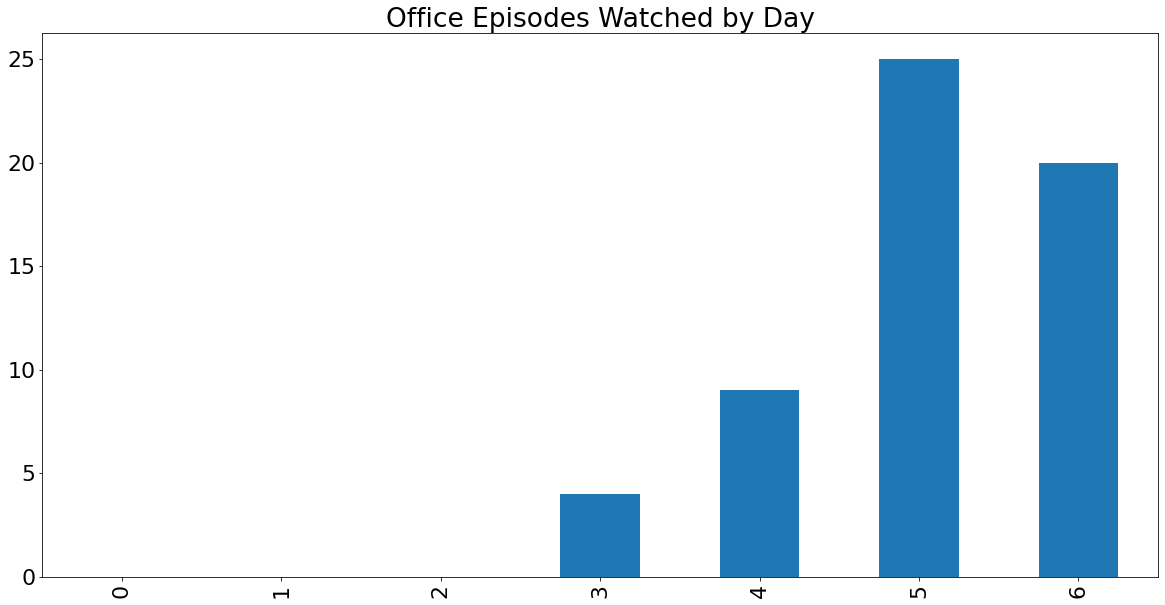

In [36]:
#To plot my viewing habits by week, we will use pd.categorical to plot the data by day, count the number of episodes, sort and plot the data.
Amsterdam['weekday'] = pd.Categorical(Amsterdam['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
Amsterdam_by_day = Amsterdam['weekday'].value_counts()
Amsterdam_by_day = Amsterdam_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
Amsterdam_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

In [37]:
#I am a good employee. My mondays to wednesdays are 'no new amsterdam days' but saturdays and sundays?? No jokes! 
#We are done here(for now). After I  watch the remaining seasons, i wil be back here. 